In [3]:
import os, dotenv

dotenv.load_dotenv()

os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["COMPOSIO_API_KEY"] = os.getenv("COMPOSIO_API_KEY")

In [6]:
## Models
from langchain_google_genai import  ChatGoogleGenerativeAI
from langchain_groq import  ChatGroq

gemini_model = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp")
llama_model = ChatGroq(model="llama-3.3-70b-versatile")
deepseek_model = ChatGroq(model="deepseek-r1-distill-llama-70b")

In [16]:
from typing_extensions import TypedDict
from typing import Annotated, Literal
from langgraph.graph.message import add_messages

## State
class LinkedInGraphState(TypedDict):
    query: Annotated[list, add_messages]
    task: str
    critique: str
    post: str
    feedback: str
    context: list


In [21]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily_search = TavilySearchResults(max_results=5)

def web_search(state: LinkedInGraphState):
    pass

In [19]:
def post_writer(state: LinkedInGraphState):
    pass

In [22]:
def critique_generator(state: LinkedInGraphState):
    pass

In [23]:
def upload_post(state: LinkedInGraphState):
    pass

In [10]:
from langchain_core.messages import SystemMessage, AIMessage, ToolMessage, HumanMessage, AnyMessage

## LinkedIn Agents Node
async def linkedin_agent_team(state: LinkedInGraphState):

    messages = state["query"]
    last_message = messages[-1]

    tool_messages = []

    if hasattr(last_message, 'tool_calls') and last_message.tool_calls:
    # Process every call in the list
      for call in last_message.tool_calls:
          print("Processing tool call: %s", call)
          tool_name = call.get("name")
          tool_id = call.get("id")
          args = call.get("args")


          if tool_name == "LINKEDIN_AGENTS":
              response = graph.invoke(last_message)
              res = LINKEDIN_AGENTS(**args)
              print(f"****LinkedI Agents: {res}******")

              tool_msg = ToolMessage(
                    name=tool_name,
                    content="The task has successfully been completed!",
                    tool_call_id=tool_id  # Use the extracted tool_call_id
                )
              tool_messages.append(tool_msg)

    return {"query": tool_messages}


In [11]:
## XYZ Agent Node
def xyz_agent(state: LinkedInGraphState):

    tool_msg = ToolMessage(
                    name=tool_name,
                    content="The task has successfully been completed!",
                    tool_call_id=tool_id  # Use the extracted tool_call_id
                )
    return {"query": tool_msg}

In [17]:
def task_router(state: LinkedInGraphState) -> Literal["post_writer", "web_search"]:
    pass

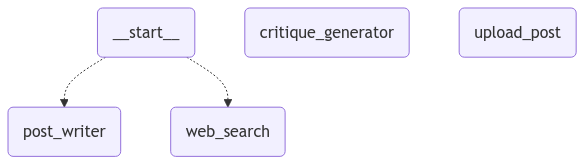

In [28]:
from langchain_core.runnables import RunnableConfig
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode

from typing import TypedDict, Annotated
from IPython.display import Image, display

# Build graph
builder = StateGraph(LinkedInGraphState)

builder.add_node("post_writer", post_writer)
builder.add_node("web_search", web_search)
builder.add_node("critique_generator", critique_generator)
builder.add_node("upload_post", upload_post)

builder.add_conditional_edges(START, task_router, ["post_writer", "web_search"])

graph = builder.compile()

## Display graph
display(Image(graph.get_graph().draw_mermaid_png()))
